In [36]:
#라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras import layers 
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Input, Dropout, BatchNormalization

In [2]:
%cd drive/MyDrive/heart_beat/data/biometric_data/

/content/drive/MyDrive/heart_beat/data/biometric_data


In [3]:
df = pd.read_csv('PPG_data.csv')

In [4]:
df = df.drop(['Unnamed: 11'], axis=1)
df

,HR,HRV,SDNN,RMSSD,PNN50,VLF,LF,HF,gender,age,blood_sugar
0,82,142,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
1,73,309,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
2,79,48,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
3,83,370,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
4,97,-1,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,183
...,...,...,...,...,...,...,...,...,...,...,...
5335,17,-3097,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5336,57,2427,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5337,78,993,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125
5338,91,1172,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,125


HR * RMSSD * PNN50

HR * HRV * SDNN

HR * HRV * VLF

HR * SDNN * RMSSD

HRV * RMSSD * PNN50

HRV * SDNN * RMSSD

HRV * VLF * LF

HRV * SDNN * PNN50

SDNN * RMSSD * PNN50 

SDNN * LF * VLF

SDNN * RMSSD * VLF

SDNN * PNN50 * HR

VLF * RMSSD * PNN50

VLF * LF * RMSSD

VLF * HRV * PNN50

VLF * SDNN * RMSSD

LF * RMSSD * PNN50

LF * HR * HRV

LF * PNN50 * HRV

LF * RMSSD * SDNN

In [5]:
df['T1'] = df['HR'] * df['RMSSD'] * df['PNN50']
df['T2']=df['HR'] * df['HRV'] * df['SDNN']
df['T3'] = df['HR'] * df['HRV'] * df['VLF']
df['T4'] = df['HR'] * df['SDNN'] * df['RMSSD']
df['T5'] = df['HRV'] * df['RMSSD'] * df['PNN50']
df['T6'] = df['HRV'] * df['SDNN'] * df['RMSSD']
df['T7'] = df['HRV'] * df['VLF'] * df['LF']
df['T8'] = df['HRV'] * df['SDNN'] * df['PNN50']
df['T9'] = df['SDNN'] * df['RMSSD'] * df['PNN50'] 
df['T10'] = df['SDNN'] * df['LF'] * df['VLF']
df['T11'] = df['SDNN'] * df['RMSSD'] * df['VLF']
df['T12'] = df['SDNN'] * df['PNN50'] * df['HR']
df['T13'] = df['VLF'] * df['RMSSD'] * df['PNN50']
df['T14'] = df['VLF'] * df['LF'] * df['RMSSD']
df['T15'] = df['VLF'] *df['HRV'] * df['PNN50']
df['T16'] = df['VLF'] * df['SDNN'] * df['RMSSD']
df['T17'] = df['LF'] * df['RMSSD'] * df['PNN50']
df['T18'] = df['LF'] *df['HR'] * df['HRV']
df['T19'] = df['LF'] * df['PNN50'] * df['HRV']
df['T20'] = df['LF'] * df['RMSSD'] * df['SDNN']

In [6]:
df

,HR,HRV,SDNN,RMSSD,PNN50,VLF,LF,HF,gender,age,...,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
0,82,142,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,...,1.623483e+06,2899.931263,15114.537263,2.513760e+07,2.359258e+04,1.623483e+06,49814.727772,1.111199e+07,7.775680e+04,5.350699e+06
1,73,309,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,...,1.623483e+06,2581.646124,15114.537263,2.513760e+07,5.133879e+04,1.623483e+06,49814.727772,2.152637e+07,1.692032e+05,5.350699e+06
2,79,48,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,...,1.623483e+06,2793.836217,15114.537263,2.513760e+07,7.974957e+03,1.623483e+06,49814.727772,3.618744e+06,2.628399e+04,5.350699e+06
3,83,370,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,...,1.623483e+06,2935.296278,15114.537263,2.513760e+07,6.147363e+04,1.623483e+06,49814.727772,2.930686e+07,2.026057e+05,5.350699e+06
4,97,-1,61.633,90.972,0.5738,289.552,954.31,1128.05,0,57,...,1.623483e+06,3430.406494,15114.537263,2.513760e+07,-1.661449e+02,1.623483e+06,49814.727772,-9.256807e+04,-5.475831e+02,5.350699e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,17,-3097,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,...,3.695841e+06,529.000982,41371.772317,9.965045e+08,-1.581832e+06,3.695841e+06,679608.158580,-7.484529e+08,-2.598452e+07,6.071105e+07
5336,57,2427,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,...,3.695841e+06,1773.709174,41371.772317,9.965045e+08,1.239621e+06,3.695841e+06,679608.158580,1.966613e+09,2.036307e+07,6.071105e+07
5337,78,993,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,...,3.695841e+06,2427.180974,41371.772317,9.965045e+08,5.071873e+05,3.695841e+06,679608.158580,1.101078e+09,8.331493e+06,6.071105e+07
5338,91,1172,52.724,81.000,0.5902,865.406,14215.90,68600.80,0,19,...,3.695841e+06,2831.711137,41371.772317,9.965045e+08,5.986138e+05,3.695841e+06,679608.158580,1.516154e+09,9.833343e+06,6.071105e+07


In [7]:
df.corr()

,HR,HRV,SDNN,RMSSD,PNN50,VLF,LF,HF,gender,age,...,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20
HR,1.000000,0.148311,-0.026209,-0.020611,0.000496,-0.023489,-0.010896,0.019772,-0.014376,-0.070561,...,-0.024247,0.957788,-0.021861,-0.022116,0.047905,-0.024247,-0.010151,0.086757,0.068488,-0.012716
HRV,0.148311,1.000000,0.031196,0.028461,0.015335,0.006869,0.011129,0.018763,0.004308,0.002713,...,0.009641,0.143366,0.009244,0.006646,0.392441,0.009641,0.013595,0.431588,0.535810,0.015000
SDNN,-0.026209,0.031196,1.000000,0.749253,0.512491,0.068677,0.199296,0.275328,0.009285,0.084980,...,0.118287,0.157450,0.122995,0.068761,0.016718,0.118287,0.267179,0.055459,0.023909,0.273144
RMSSD,-0.020611,0.028461,0.749253,1.000000,0.765718,0.098619,0.274946,0.323944,0.035372,0.209829,...,0.151501,0.174200,0.152409,0.065451,0.016874,0.151501,0.347638,0.077677,0.024288,0.353683
PNN50,0.000496,0.015335,0.512491,0.765718,1.000000,0.169955,0.350693,0.383516,0.006892,0.123606,...,0.217577,0.205701,0.240955,0.166666,0.014886,0.217577,0.435262,0.085504,0.016574,0.409529
VLF,-0.023489,0.006869,0.068677,0.098619,0.169955,1.000000,0.923611,0.554506,-0.139079,-0.121115,...,0.991143,0.013912,0.984446,0.978313,0.032753,0.991143,0.856932,0.107528,0.027361,0.870641
LF,-0.010896,0.011129,0.199296,0.274946,0.350693,0.923611,1.000000,0.753804,-0.020069,-0.064911,...,0.940288,0.067407,0.944058,0.881831,0.035089,0.940288,0.981013,0.146328,0.034764,0.985760
HF,0.019772,0.018763,0.275328,0.323944,0.383516,0.554506,0.753804,1.000000,0.019141,-0.145042,...,0.625180,0.112390,0.654614,0.514374,0.039111,0.625180,0.826148,0.155491,0.045912,0.811483
gender,-0.014376,0.004308,0.009285,0.035372,0.006892,-0.139079,-0.020069,0.019141,1.000000,0.043278,...,-0.123433,-0.019276,-0.123425,-0.167171,-0.001959,-0.123433,0.019634,0.017939,0.002835,0.019864
age,-0.070561,0.002713,0.084980,0.209829,0.123606,-0.121115,-0.064911,-0.145042,0.043278,1.000000,...,-0.121586,-0.047275,-0.114620,-0.121562,-0.010860,-0.121586,-0.033671,0.006145,-0.018804,-0.054964


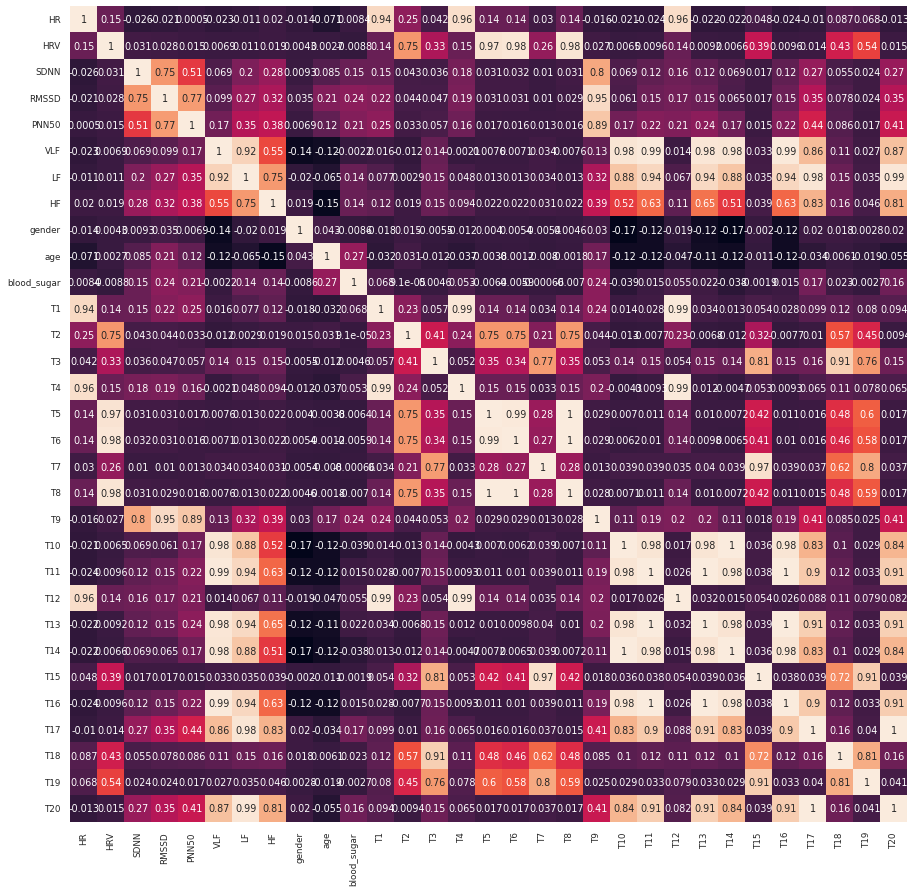

In [34]:
df_corr = df.corr()
plt.figure(figsize=(15,15))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [9]:
df.columns

Index(['HR', 'HRV', 'SDNN', 'RMSSD', 'PNN50', 'VLF', 'LF', 'HF', 'gender',
       'age', 'blood_sugar', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8',
       'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18',
       'T19', 'T20'],
      dtype='object')

In [10]:
blood_sugar_rate = df
x = blood_sugar_rate[['HR', 'HRV', 'SDNN', 'RMSSD', 'PNN50', 'VLF', 'LF', 'HF', 'gender',
       'age', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8',
       'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18',
       'T19', 'T20']]             # x축에 input 데이터 나열
y = blood_sugar_rate[['blood_sugar']]   

x = x.to_numpy()
y = y.to_numpy()
y = np.array(y, dtype = int)

x_train_all, x_test, y_train_all, y_test = \
  train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)      # 훈련 데이터와 테스트 데이터 분류

x_train, x_val, y_train, y_val = \
  train_test_split(x_train_all,y_train_all,stratify=y_train_all, \
                   test_size=0.2,random_state=42)                     # 훈련 데이터와 검증 데이터 분류


scaler = StandardScaler()   #표준화
scaler.fit(x_train)     # 변환 규칙을 익히기
x_train_scaled = scaler.transform(x_train)
x_scaler_test = scaler.transform(x_test)
x_scaler_train = scaler.transform(x_train)  
x_scaler_val = scaler.transform(x_val)

In [13]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  

#입력층
model.add(layers.Dense(10, input_shape=(30,)))  #뉴런 개수, 입력층 차원 (이때, 피쳐 수가 6개이므로 (6,))
model.add(layers.Activation('relu'))  
model.add(BatchNormalization())

model.add(layers.Dense(8))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(64))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(128))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(64))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(BatchNormalization())

model.add(layers.Dense(8))         
model.add(layers.Activation('relu'))


#회귀모형(regression) 구축을 위해서 linear 활성함수 사용
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

# 모델 구축하기
model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=['mae', 'mse'])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                310       
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_9 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 8)                 88        
                                                                 
 activation_12 (Activation)  (None, 8)                 0         
                                                                 
 batch_normalization_10 (Bat  (None, 8)                32        
 chNormalization)                                     

In [14]:
#best model 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model_regress_explosion.h5',   #ModelCheckpoint의 객체 #'best-model.h5'이름으로 저장
                                                save_best_only=True) #모델이 "최상"으로 간주될 때만 저장


hist_1 = model.fit(
    x_scaler_train  , y_train,
    batch_size=10,    
    epochs=200,       
    validation_split=0.2,  
    callbacks=[checkpoint_cb],  
    verbose=1) 

# 테스트 데이터 입력
scores = model.evaluate(x_scaler_test, y_test)
# print('test_loss: ', scores[0])
# print('test_mae: ', scores[1])

# 모델 저장
model.save("dnn_estate_explosion.h5")

Epoch 1/200
274/274 [==============================] - 7s 9ms/step - loss: 13301.9658 - mae: 111.2645 - mse: 13301.9668 - val_loss: 8784.3330 - val_mae: 88.1101 - val_mse: 8784.3330
Epoch 2/200
274/274 [==============================] - 2s 6ms/step - loss: 5637.0269 - mae: 65.7021 - mse: 5637.0269 - val_loss: 1577.7640 - val_mae: 25.1736 - val_mse: 1577.7640
Epoch 3/200
274/274 [==============================] - 2s 7ms/step - loss: 1519.9680 - mae: 26.5143 - mse: 1519.9680 - val_loss: 1185.7858 - val_mae: 20.9641 - val_mse: 1185.7858
Epoch 4/200
274/274 [==============================] - 2s 7ms/step - loss: 1285.6967 - mae: 23.9978 - mse: 1285.6967 - val_loss: 971.1925 - val_mae: 20.9266 - val_mse: 971.1925
Epoch 5/200
274/274 [==============================] - 2s 6ms/step - loss: 1131.0881 - mae: 23.0341 - mse: 1131.0881 - val_loss: 903.8602 - val_mae: 20.3172 - val_mse: 903.8602
Epoch 6/200
274/274 [==============================] - 2s 7ms/step - loss: 1040.5028 - mae: 21.7835 - mse:

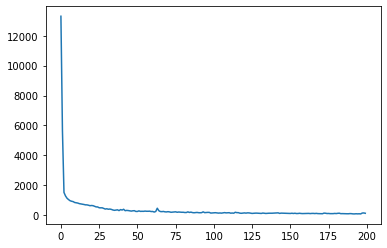

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist_1.history['loss'])

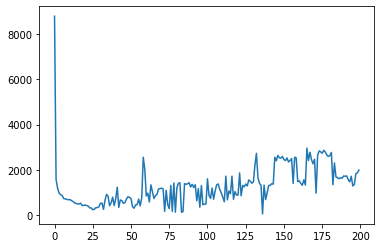

In [16]:
# val loss
plt.plot(hist_1.history['val_loss'])

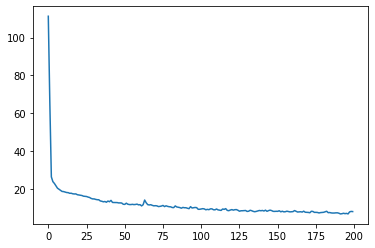

In [17]:
plt.plot(hist_1.history['mae'])

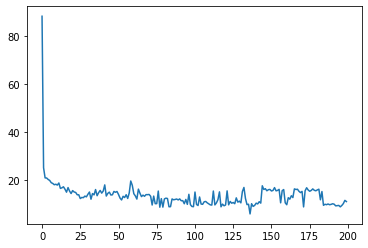

In [18]:
plt.plot(hist_1.history['val_mae'])

In [20]:
%cd /
%cd content/drive/MyDrive/heart_beat/data/biometric_data

/
/content/drive/MyDrive/heart_beat/data/biometric_data


# r2 score

In [21]:
m_best_11 = keras.models.load_model('best-model_regress_explosion.h5')

In [29]:
#train
r2_train = r2_score(y_train, m_best_11.predict(x_scaler_train))
print(r2_train)

107/107 [==============================] - 0s 2ms/step
0.9249391742244888


In [30]:
#val 
r2_val = r2_score(y_val, m_best_11.predict(x_scaler_val))
print(r2_train)

27/27 [==============================] - 0s 2ms/step
0.9249391742244888


In [31]:
#test
r2_test = r2_score(y_test, m_best_11.predict(x_scaler_test))
print(r2_test)

34/34 [==============================] - 0s 2ms/step
0.9228496705050225


# Bland Altman Plot

In [35]:
y_pred = m_best_11.predict(x_scaler_test)

34/34 [==============================] - 0s 2ms/step


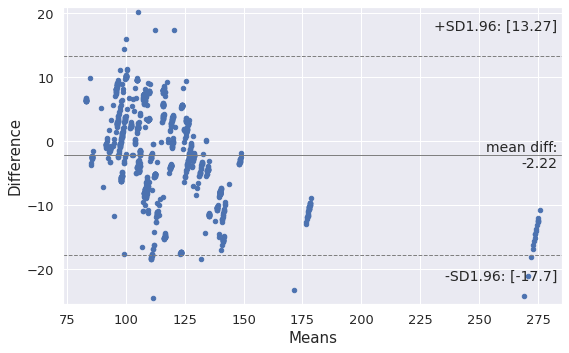

In [37]:
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(y_pred, y_test, ax = ax)
plt.show()

# mae, mse, rmse

In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE: {0:.2f}'.format(mae))
print('MSE: {0:.2f}'.format(mse))
print('RMSE: {0:.2f}'.format(rmse)) 

MAE: 6.29
MSE: 67.35
RMSE: 8.21


In [ ]:
# 모델 구조 정의하기
model_1 = tf.keras.Sequential()  

#입력층
model_1.add(layers.Dense(32, input_shape=(30,)))  #뉴런 개수, 입력층 차원 (이때, 피쳐 수가 6개이므로 (6,))
model_1.add(layers.Activation('relu'))  
model_1.add(BatchNormalization())

model_1.add(layers.Dense(64))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(128))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(256))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(512))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(12024))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(512))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(256))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(128))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(64))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

model_1.add(layers.Dense(32))         
model_1.add(layers.Activation('relu'))
model_1.add(BatchNormalization())

#회귀모형(regression) 구축을 위해서 linear 활성함수 사용
model_1.add(layers.Dense(1))
model_1.add(layers.Activation('linear')) 

# 모델 구축하기
model_1.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=['mae', 'mse'])    # 실험 후 관찰하고 싶은 metric 들을 나열함.